In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

### Handling Missing Data

- forward fill is df.fillna(method = 'ffill', inplace = 'TRUE')
- backward fill is df.fillna(method = 'bfill', inplace = 'TRUE')
- Good <a href=""http://stackoverflow.com/questions/22532302/pandas-peculiar-performance-drop-for-inplace-rename-after-dropna>link</a> on use of inplace in these method. 

In [2]:
# Functions

def symbol_to_path(symbol, base_dir = 'data'):
    '''Return CSV file path given ticker symbol'''
    return os.path.join(base_dir, '{}.csv'.format(str(symbol)))

def get_data(symbols, dates):
    '''Read stock data (adjusted close) given symbols, from CSV files'''
    df = pd.DataFrame(index = dates)
    if 'SPY' not in symbols:  # Add SPY for reference, if absent
        symbols.insert(0,'SPY')
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), 
                          index_col = 'Date', 
                          parse_dates = True, 
                          usecols = ['Date', 'Adj Close'], 
                          na_values = ['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY': # drop dates SPY did not trade
            df = df.dropna(subset=['SPY'])
    return df

def plot_data(df, title = 'Stock prices'):
    '''Plot stock prices'''
    ax = df.plot(title = title, fontsize = 12)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()

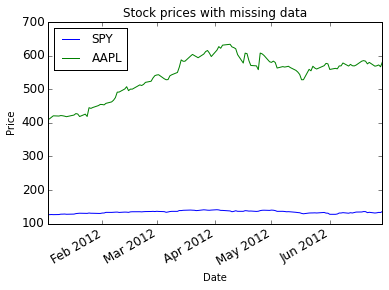

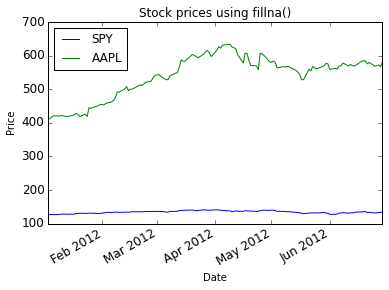

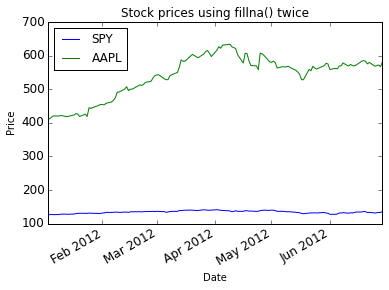

In [3]:
# Missing data uses pandas fillna() method

start_date = '2012-01-01'
end_date = '2012-06-30'
dates = pd.date_range(start_date, end_date)

#symbols = ['FAKE2']
symbols = ['AAPL']
df = get_data(symbols, dates)


plot_data(df, title = 'Stock prices with missing data')

df.fillna(method = 'ffill', inplace = 'TRUE')

plot_data(df, title = 'Stock prices using fillna()')

df.fillna(method = 'bfill', inplace = 'TRUE')

plot_data(df, title = 'Stock prices using fillna() twice')

